In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from itertools import chain

In [26]:
# Create pandas dataframe from csv
df = pd.read_csv("WFPP_Jobs.csv", sep=",", header=None, names=["ID", "Name", "Pseudonyms", "Link", "Picture", "Jobs", "Lived in", "Born", "Died"])

In [23]:
# Print a short overview of the dataframe
df

,ID,Name,Pseudonyms,Link,Picture,Jobs,Lived in,Born,Died
0,21229,Abby Meehan,NaN,https://wfpp.columbia.edu/person/abby-meehan/,NaN,director|writer,England,1853,1931
1,1342,Ada Aline Urban,Ada Gorecki|Ada Aline Jones,https://wfpp.columbia.edu/person/ada-aline-urban/,https://wfpp.columbia.edu/wp-content/uploads/2...,business partner|company director,England|United States,1868,1937
2,9728,Emilia Saleny,Josefina Emilia Saleny|Emilia Saleny Ferrari,https://wfpp.columbia.edu/person/emilia-saleny-2/,https://wfpp.columbia.edu/wp-content/uploads/2...,educator|director|actress,Argentina,1894,1978
3,1353,Agnes Gavin,Agnes Kurtz|Agnes Adele Wangenheim,https://wfpp.columbia.edu/person/agnes-gavin/,NaN,actress|writer,Australia,1872,1948
4,12539,Beatrice Maude Tildesley,NaN,https://wfpp.columbia.edu/person/beatrice-maud...,https://wfpp.columbia.edu/wp-content/uploads/2...,critic|co-founder|secretary|international wome...,Australia,1886,1977
...,...,...,...,...,...,...,...,...,...
295,1631,Wanda Tuchock,NaN,https://wfpp.columbia.edu/person/wanda-tuchock/,NaN,adapter|director|filmmaker|producer|writer,United States,1898,1985
296,1632,Winifred Dunn,Mrs. Harold Swartz,https://wfpp.columbia.edu/person/winifred-dunn/,https://wfpp.columbia.edu/wp-content/uploads/C...,editor|writer,United States,1899,Unknown
297,15052,Winnifred Eaton,Onoto Watanna|Winnifred Eaton Reeve|Winnifred ...,https://wfpp.columbia.edu/person/winnifred-eaton/,https://wfpp.columbia.edu/wp-content/uploads/2...,adapter|writer|literary advisor|editor,United States,1875,1954
298,5,Zora Neale Hurston,NaN,https://wfpp.columbia.edu/person/zora-neale-hu...,https://wfpp.columbia.edu/wp-content/uploads/H...,director|filmmaker|writer|personal assistant,United States,1891,1960


In [27]:
# Split up Country 1|Country 2|Country 3|... values into multiple rows to properly count the countries each woman lived in
# Don't know exactly what code does, stackoverflow magic
df_countries = (df.set_index(['ID', 'Name', 'Pseudonyms', 'Link', 'Picture', 'Jobs', 'Born', 'Died'])
    .stack()
    .str.split('|', expand=True)
    .stack().unstack(-2)
    .reset_index(-1, drop=True)
    .reset_index())
#df_countries.head()
df_countries.to_csv("df_countries.csv", sep=",")
df_countries=pd.read_csv("df_countries.csv")
df_countries


,Unnamed: 0,ID,Name,Pseudonyms,Link,Picture,Jobs,Born,Died,Lived in
0,0,21229,Abby Meehan,NaN,https://wfpp.columbia.edu/person/abby-meehan/,NaN,director|writer,1853,1931,England
1,1,1342,Ada Aline Urban,Ada Gorecki|Ada Aline Jones,https://wfpp.columbia.edu/person/ada-aline-urban/,https://wfpp.columbia.edu/wp-content/uploads/2...,business partner|company director,1868,1937,England
2,2,1342,Ada Aline Urban,Ada Gorecki|Ada Aline Jones,https://wfpp.columbia.edu/person/ada-aline-urban/,https://wfpp.columbia.edu/wp-content/uploads/2...,business partner|company director,1868,1937,United States
3,3,9728,Emilia Saleny,Josefina Emilia Saleny|Emilia Saleny Ferrari,https://wfpp.columbia.edu/person/emilia-saleny-2/,https://wfpp.columbia.edu/wp-content/uploads/2...,educator|director|actress,1894,1978,Argentina
4,4,1353,Agnes Gavin,Agnes Kurtz|Agnes Adele Wangenheim,https://wfpp.columbia.edu/person/agnes-gavin/,NaN,actress|writer,1872,1948,Australia
...,...,...,...,...,...,...,...,...,...,...
369,369,8,Viola Lawrence,Viola Mallory,https://wfpp.columbia.edu/person/viola-lawrence/,https://wfpp.columbia.edu/wp-content/uploads/2...,editor,1894,1973,United States
370,370,1631,Wanda Tuchock,NaN,https://wfpp.columbia.edu/person/wanda-tuchock/,NaN,adapter|director|filmmaker|producer|writer,1898,1985,United States
371,371,1632,Winifred Dunn,Mrs. Harold Swartz,https://wfpp.columbia.edu/person/winifred-dunn/,https://wfpp.columbia.edu/wp-content/uploads/C...,editor|writer,1899,Unknown,United States
372,372,15052,Winnifred Eaton,Onoto Watanna|Winnifred Eaton Reeve|Winnifred ...,https://wfpp.columbia.edu/person/winnifred-eaton/,https://wfpp.columbia.edu/wp-content/uploads/2...,adapter|writer|literary advisor|editor,1875,1954,United States


In [28]:
# Split up Job 1|Job 2|Job 3|... values into multiple rows to properly count the jobs each woman worked in
df_jobs = (df.set_index(['ID', 'Name', 'Pseudonyms', 'Link', 'Picture', 'Lived in', 'Born', 'Died'])
    .stack()
    .str.split('|', expand=True)
    .stack().unstack(-2)
    .reset_index(-1, drop=True)
    .reset_index())
#df_jobs.head()
df_jobs.to_csv("df_jobs.csv", sep=",")
df_jobs=pd.read_csv("df_jobs.csv")
df_jobs

,Unnamed: 0,ID,Name,Pseudonyms,Link,Picture,Lived in,Born,Died,Jobs
0,0,21229,Abby Meehan,NaN,https://wfpp.columbia.edu/person/abby-meehan/,NaN,England,1853,1931,director
1,1,21229,Abby Meehan,NaN,https://wfpp.columbia.edu/person/abby-meehan/,NaN,England,1853,1931,writer
2,2,1342,Ada Aline Urban,Ada Gorecki|Ada Aline Jones,https://wfpp.columbia.edu/person/ada-aline-urban/,https://wfpp.columbia.edu/wp-content/uploads/2...,England|United States,1868,1937,business partner
3,3,1342,Ada Aline Urban,Ada Gorecki|Ada Aline Jones,https://wfpp.columbia.edu/person/ada-aline-urban/,https://wfpp.columbia.edu/wp-content/uploads/2...,England|United States,1868,1937,company director
4,4,9728,Emilia Saleny,Josefina Emilia Saleny|Emilia Saleny Ferrari,https://wfpp.columbia.edu/person/emilia-saleny-2/,https://wfpp.columbia.edu/wp-content/uploads/2...,Argentina,1894,1978,educator
...,...,...,...,...,...,...,...,...,...,...
1166,1166,15052,Winnifred Eaton,Onoto Watanna|Winnifred Eaton Reeve|Winnifred ...,https://wfpp.columbia.edu/person/winnifred-eaton/,https://wfpp.columbia.edu/wp-content/uploads/2...,United States,1875,1954,editor
1167,1167,5,Zora Neale Hurston,NaN,https://wfpp.columbia.edu/person/zora-neale-hu...,https://wfpp.columbia.edu/wp-content/uploads/H...,United States,1891,1960,director
1168,1168,5,Zora Neale Hurston,NaN,https://wfpp.columbia.edu/person/zora-neale-hu...,https://wfpp.columbia.edu/wp-content/uploads/H...,United States,1891,1960,filmmaker
1169,1169,5,Zora Neale Hurston,NaN,https://wfpp.columbia.edu/person/zora-neale-hu...,https://wfpp.columbia.edu/wp-content/uploads/H...,United States,1891,1960,writer


In [29]:
# Group by the countries each person lived in and count it
df_countries_count = df_countries.groupby("Lived in", as_index=False).count()
df_countries_count.to_csv("df_countries_count.csv", sep=",")
df_countries_count=pd.read_csv("df_countries_count.csv")
df_countries_count

,Unnamed: 0,Lived in,Unnamed: 0.1,ID,Name,Pseudonyms,Link,Picture,Jobs,Born,Died
0,0,Argentina,1,1,1,1,1,1,1,1,1
1,1,Australia,15,15,15,11,15,11,15,15,15
2,2,Austria,3,3,3,3,3,2,3,3,3
3,3,Brazil,3,3,3,3,3,3,3,3,3
4,4,Canada,8,8,8,7,8,7,8,8,8
5,5,Chile,3,3,3,1,3,1,3,3,3
6,6,China,9,9,9,9,9,9,9,9,9
7,7,Colombia,1,1,1,1,1,1,1,1,1
8,8,Croatia,1,1,1,1,1,1,1,1,1
9,9,Czechoslovakia,2,2,2,2,2,1,2,2,2


In [30]:
# Group by the jobs each woman worked in
df_jobs_count = df_jobs.groupby("Jobs", as_index=False).count()
#job_mask = (df_jobs_count["ID"] > 4)
#df_jobs_count = df_jobs_count[job_mask]
df_jobs_count.to_csv("df_jobs_count.csv", sep=",")
df_countries_count=pd.read_csv("df_jobs_count.csv")
df_jobs_count

,Jobs,Unnamed: 0,ID,Name,Pseudonyms,Link,Picture,Lived in,Born,Died
0,accountant,5,5,5,5,5,4,5,5,5
1,actress,160,160,160,136,160,145,160,160,160
2,adapter,35,35,35,31,35,30,35,35,35
3,agent,3,3,3,3,3,3,3,3,3
4,animal trainer,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
89,treasurer,1,1,1,1,1,1,1,1,1
90,typist,1,1,1,1,1,1,1,1,1
91,visual artist,15,15,15,11,15,13,15,15,15
92,weaver,1,1,1,1,1,1,1,1,1


In [31]:
df_born = df.groupby("Born", as_index=False).count()
born_mask = (df_born["Born"] != 'Unknown' )
df_born = df_born[born_mask]
df_born.to_csv("df_born.csv", sep=",")
df_born

,Born,ID,Name,Pseudonyms,Link,Picture,Jobs,Lived in,Died
0,1841,2,2,2,2,1,2,2,2
1,1844,1,1,1,1,1,1,1,1
2,1848,1,1,1,1,1,1,1,1
3,1853,2,2,1,2,1,2,2,2
4,1856,1,1,0,1,1,1,1,1
5,1858,2,2,2,2,1,2,2,2
6,1859,1,1,1,1,1,1,1,1
7,1862,3,3,1,3,1,3,3,3
8,1863,1,1,1,1,1,1,1,1
9,1864,4,4,4,4,3,4,4,4


In [20]:
df_died = df.groupby("Died", as_index=False).count()
died_mask = (df_died["Died"] != 'Unknown' )
df_died = df_died[died_mask]
df_died.to_csv("df_died.csv", sep=",")
df_died.head()

,Died,ID,Name,Pseudonyms,Link,Picture,Jobs,Lived in,Born
0,1907,1,1,1,1,0,1,1,1
1,1913,1,1,1,1,0,1,1,1
2,1917,1,1,1,1,0,1,1,1
3,1919,1,1,1,1,1,1,1,1
4,1920,3,3,2,3,2,3,3,3


In [19]:
import numpy as np
import seaborn as sns
df_jobs=pd.read_csv("df_jobs.csv")
uniquevalues = np.unique(df_jobs[['Born']].values)
for Born in uniquevalues:
    df1840_1865 = df_jobs[df_jobs['Born'] < '1865']
    df1840_1865.to_csv("df1840_1865.csv", sep=",")
df1840_1865=pd.read_csv("df1840_1865.csv")
df1840_1865.head()

,Unnamed: 0,Unnamed: 0.1,ID,Name,Pseudonyms,Link,Picture,Lived in,Born,Died,Jobs
0,0,0,21229,Abby Meehan,NaN,https://wfpp.columbia.edu/person/abby-meehan/,NaN,England,1853,1931,director
1,1,1,21229,Abby Meehan,NaN,https://wfpp.columbia.edu/person/abby-meehan/,NaN,England,1853,1931,writer
2,43,43,1551,Kate Howarde,Catherine Clarissa Black|Catherine Clarissa Jo...,https://wfpp.columbia.edu/person/kate-howarde/,https://wfpp.columbia.edu/wp-content/uploads/2...,Australia|New Zealand|United States,1864,1939,director
3,44,44,1551,Kate Howarde,Catherine Clarissa Black|Catherine Clarissa Jo...,https://wfpp.columbia.edu/person/kate-howarde/,https://wfpp.columbia.edu/wp-content/uploads/2...,Australia|New Zealand|United States,1864,1939,writer
4,45,45,1551,Kate Howarde,Catherine Clarissa Black|Catherine Clarissa Jo...,https://wfpp.columbia.edu/person/kate-howarde/,https://wfpp.columbia.edu/wp-content/uploads/2...,Australia|New Zealand|United States,1864,1939,actress


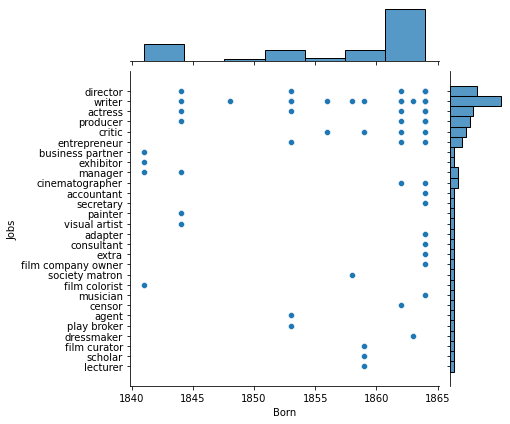

In [20]:
sns.jointplot(x='Born',y='Jobs', data=df1840_1865)

In [21]:
import numpy as np
uniquevalues = np.unique(df_jobs[['Born']].values)
for Born in uniquevalues:
    df1890 = df_jobs[df_jobs['Born'] < '1890' ]
    df1890.to_csv("df1890.csv", sep=",")
df1890=pd.read_csv("df1890.csv")

In [22]:
uniquevalues = np.unique(df1890[['Born']].values)
for Born in uniquevalues:
    df1865_1890 = df1890[ 1864 < df1890['Born']]
    df1865_1890.to_csv("df1865_1890.csv", sep=",")
df1865_1890=pd.read_csv("df1865_1890.csv")
df1865_1890.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Name,Pseudonyms,Link,Picture,Lived in,Born,Died,Jobs
0,2,2,2,1342,Ada Aline Urban,Ada Gorecki|Ada Aline Jones,https://wfpp.columbia.edu/person/ada-aline-urban/,https://wfpp.columbia.edu/wp-content/uploads/2...,England|United States,1868,1937,business partner
1,3,3,3,1342,Ada Aline Urban,Ada Gorecki|Ada Aline Jones,https://wfpp.columbia.edu/person/ada-aline-urban/,https://wfpp.columbia.edu/wp-content/uploads/2...,England|United States,1868,1937,company director
2,4,7,7,1353,Agnes Gavin,Agnes Kurtz|Agnes Adele Wangenheim,https://wfpp.columbia.edu/person/agnes-gavin/,NaN,Australia,1872,1948,actress
3,5,8,8,1353,Agnes Gavin,Agnes Kurtz|Agnes Adele Wangenheim,https://wfpp.columbia.edu/person/agnes-gavin/,NaN,Australia,1872,1948,writer
4,6,9,9,12539,Beatrice Maude Tildesley,NaN,https://wfpp.columbia.edu/person/beatrice-maud...,https://wfpp.columbia.edu/wp-content/uploads/2...,Australia,1886,1977,critic


In [23]:
uniquevalues = np.unique(df[['Born']].values)
for Born in uniquevalues:
    df1915 = df[df['Born'] < '1915']
    df1915.to_csv("df1915.csv", sep=",")
df1915=pd.read_csv("df1915.csv")

In [24]:
uniquevalues = np.unique(df1915[['Born']].values)
for Born in uniquevalues:
    df1890_1915 = df1915[ 1890 < df1915['Born']]
    df1890_1915.to_csv("df1890_1915.csv", sep=",")
df1890_1915=pd.read_csv("df1890_1915.csv")
df1890_1915.head()

,Unnamed: 0,Unnamed: 0.1,ID,Name,Pseudonyms,Link,Picture,Jobs,Lived in,Born,Died
0,2,2,9728,Emilia Saleny,Josefina Emilia Saleny|Emilia Saleny Ferrari,https://wfpp.columbia.edu/person/emilia-saleny-2/,https://wfpp.columbia.edu/wp-content/uploads/2...,educator|director|actress,Argentina,1894,1978
1,7,7,1592,Mona Donaldson,Miss D,https://wfpp.columbia.edu/person/mona-donaldson/,NaN,booking clerk|censor|editor,Australia,1901,Unknown
2,8,8,1624,Paulette McDonagh,NaN,https://wfpp.columbia.edu/person/paulette-mcdo...,https://wfpp.columbia.edu/wp-content/uploads/2...,director|filmmaker|business partner|writer,Australia,1901,1978
3,10,10,1620,Isabel McDonagh,Marie Lorraine,https://wfpp.columbia.edu/person/isabel-mcdonagh/,https://wfpp.columbia.edu/wp-content/uploads/2...,business partner|actress,Australia|England,1899,1982
4,11,11,1622,Phyllis McDonagh,NaN,https://wfpp.columbia.edu/person/phyllis-mcdon...,https://wfpp.columbia.edu/wp-content/uploads/2...,art director|business partner|writer|producer|...,Australia|New Zealand,1900,1972


In [27]:
dfj = pd.read_csv("df_jobs.csv")
df_jobs_filter=dfj[['ID','Jobs']]
df_jobs_filter.to_csv("df_jobs_filter.csv", sep=",")
df_jobs_filter=pd.read_csv("df_jobs_filter.csv")
df_jobs_filter.head()

,Unnamed: 0,ID,Jobs
0,0,21229,director
1,1,21229,writer
2,2,1342,business partner
3,3,1342,company director
4,4,9728,educator


In [28]:
dfc = pd.read_csv("df_countries.csv")
df_countries_filter=dfc[['ID','Lived in']]
df_countries_filter.to_csv("df_countries_filter.csv", sep=",")
df_countries_filter=pd.read_csv("df_countries_filter.csv")
df_countries_filter.head()

,Unnamed: 0,ID,Lived in
0,0,21229,England
1,1,1342,England
2,2,1342,United States
3,3,9728,Argentina
4,4,1353,Australia


In [29]:
df_jobs_filter_count=df_jobs_filter.groupby("Jobs", as_index=False).count()
job_mask = (df_jobs_filter_count["ID"] > 4)
df_jobs_filter_count = df_jobs_filter_count[job_mask]
df_jobs_filter_count.to_csv("df_jobs_filter_count.csv", sep=",")
df_jobs_filter_count=pd.read_csv("df_jobs_filter_count.csv")
df_jobs_filter_count.head()

,Unnamed: 0,Jobs,Unnamed: 0.1,ID
0,0,accountant,5,5
1,1,actress,160,160
2,2,adapter,35,35
3,7,art director,6,6
4,10,business partner,11,11


In [30]:
df_countries_filter_count=df_countries_filter.groupby("Lived in", as_index=False).count()
df_countries_filter_count.to_csv("df_countries_filter_count.csv", sep=",")
df_countries_filter_count=pd.read_csv("df_countries_filter_count.csv")
df_countries_filter_count.head()

,Unnamed: 0,Lived in,Unnamed: 0.1,ID
0,0,Argentina,1,1
1,1,Australia,15,15
2,2,Austria,3,3
3,3,Brazil,3,3
4,4,Canada,8,8
